In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [7]:
fashion_train=pd.read_csv("fashion-mnist_train.csv")
fashion_test=pd.read_csv("fashion-mnist_test.csv")

In [8]:
fashion_train.shape

(60000, 785)

In [9]:
X_train_fashion=fashion_train.drop("label",axis=1)
y_train_fashion=fashion_train["label"]
X_test_fashion=fashion_test.drop("label",axis=1)
y_test_fashion=fashion_test["label"]

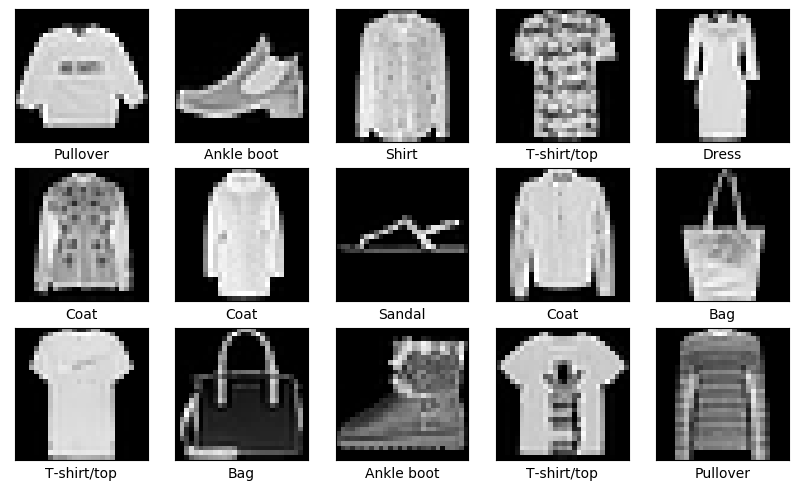

In [11]:
#Reshape the dataset
x_train_reshape=X_train_fashion.values.reshape(-1,28,28)
x_test_reshape=X_test_fashion.values.reshape(-1,28,28)

#names of clothing accessories in order
col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#Visualizing the digits
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_reshape[i], cmap='gray')
    plt.xlabel(col_names[y_train_fashion[i]])
plt.show()

In [12]:
#Encoding Digit MNIST Labels
y_train_fashion = to_categorical(y_train_fashion, num_classes=10)

y_test_fashion = to_categorical(y_test_fashion, num_classes=10)

In [13]:
#!pip install scikit-learn==0.24.2

In [14]:
#Creating base neural network
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10,activation='softmax'),
])

In [15]:
#param_number=output_channel_number*(input_channel_number+1)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 24)                3096      
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 24)               96        
 hNormalization)                                        

In [16]:
#https://keras.io/api/losses/probabilistic_losses/#sparsecategoricalcrossentropy-class

In [17]:
#Compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

In [18]:
history=model.fit(X_train_fashion, y_train_fashion, batch_size=100, epochs=10,validation_data=(X_test_fashion, y_test_fashion))

Epoch 1/10
600/600 [==============================] - 8s 8ms/step - loss: 1.0885 - accuracy: 0.6261 - val_loss: 0.5073 - val_accuracy: 0.8273
Epoch 2/10
600/600 [==============================] - 4s 7ms/step - loss: 0.7211 - accuracy: 0.7542 - val_loss: 0.4716 - val_accuracy: 0.8302
Epoch 3/10
600/600 [==============================] - 4s 7ms/step - loss: 0.6595 - accuracy: 0.7756 - val_loss: 0.4383 - val_accuracy: 0.8541
Epoch 4/10
600/600 [==============================] - 5s 8ms/step - loss: 0.6313 - accuracy: 0.7865 - val_loss: 0.4527 - val_accuracy: 0.8422
Epoch 5/10
600/600 [==============================] - 4s 7ms/step - loss: 0.6095 - accuracy: 0.7951 - val_loss: 0.4212 - val_accuracy: 0.8520
Epoch 6/10
600/600 [==============================] - 4s 7ms/step - loss: 0.5825 - accuracy: 0.8024 - val_loss: 0.4419 - val_accuracy: 0.8437
Epoch 7/10
600/600 [==============================] - 4s 7ms/step - loss: 0.5807 - accuracy: 0.8039 - val_loss: 0.4336 - val_accuracy: 0.8460
Epoch 

In [19]:
test_loss_fashion, test_acc_fashion = model.evaluate(X_test_fashion, y_test_fashion)

313/313 [==============================] - 2s 4ms/step - loss: 0.4176 - accuracy: 0.8587


In [21]:
print('Fashion MNIST Test accuracy:', round(test_acc_fashion,4))

Fashion MNIST Test accuracy: 0.8587


In [25]:
#Predicting the labels-DIGIT
y_predict_fash = model.predict(X_test_fashion)
y_predict_fash=np.argmax(y_predict_fash,axis=1)
y_test_fash_eval=np.argmax(y_test_fashion,axis=1)

In [34]:
y_predicts=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

In [37]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [38]:
y_predicts[8]

4

In [39]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [40]:
y_pre=pd.DataFrame(y_predicts)

In [41]:
y_pre

,0
0,7
1,1
2,1
3,0
4,4
...,...
9995,1
9996,3
9997,4
9998,5


In [42]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

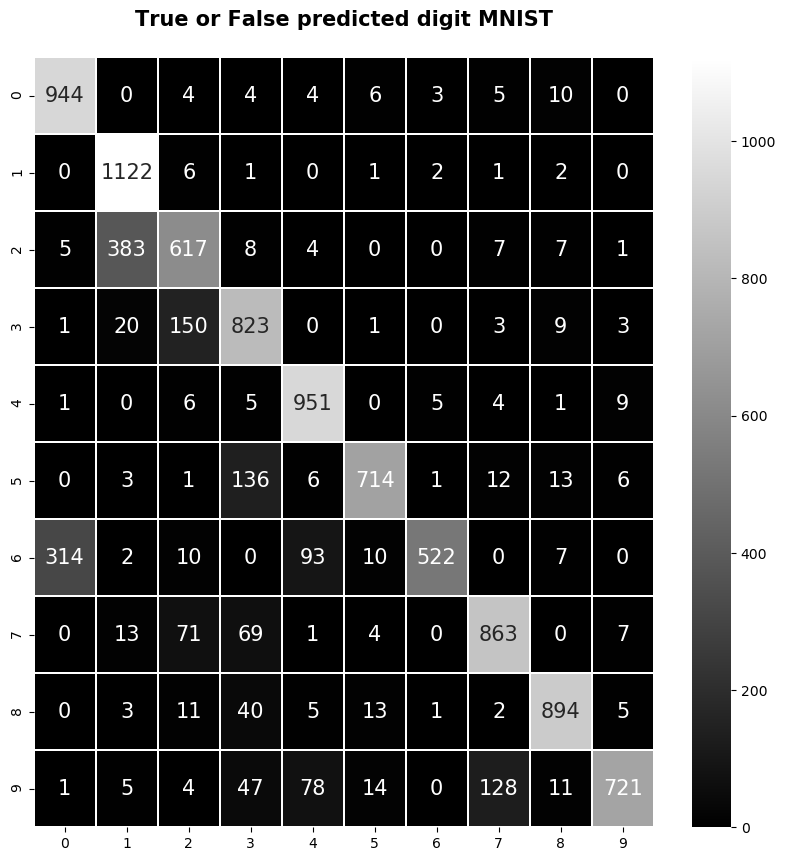

In [43]:
#Confusion matrix for Digit MNIST
con_mat=confusion_matrix(y_test_digit_eval,y_predicts)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84       980
           1       0.72      0.99      0.84      1135
           2       0.70      0.60      0.65      1032
           3       0.73      0.81      0.77      1010
           4       0.83      0.97      0.90       982
           5       0.94      0.80      0.86       892
           6       0.98      0.54      0.70       958
           7       0.84      0.84      0.84      1028
           8       0.94      0.92      0.93       974
           9       0.96      0.71      0.82      1009

    accuracy                           0.82     10000
   macro avg       0.84      0.82      0.81     10000
weighted avg       0.83      0.82      0.81     10000



In [45]:
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


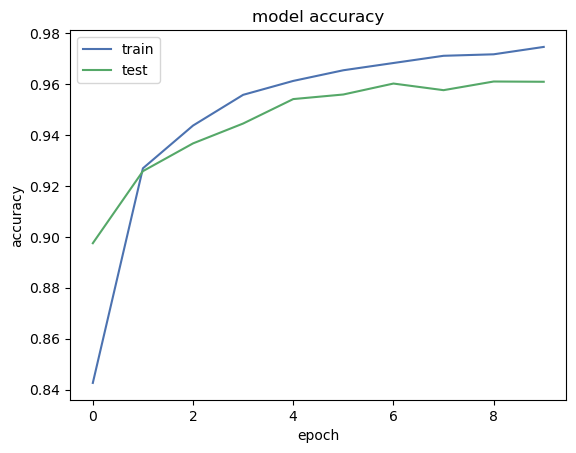

In [46]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


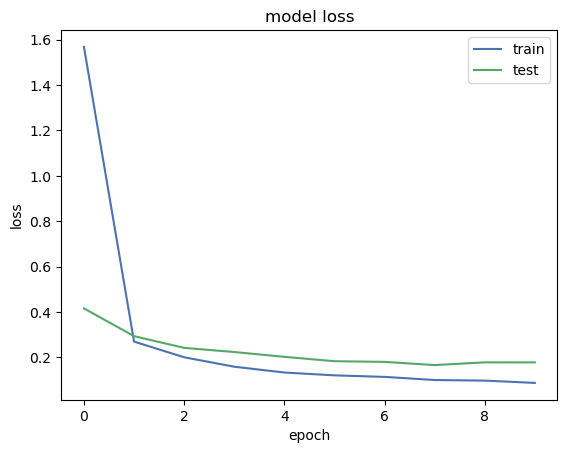

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [48]:
#tf.expand_dims(X_test_digit[0])
y_predict_single = model.predict(X_test_digit[[2]])
y_predicts_single=np.argmax(y_predict_single, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

In [49]:
y_predicts_single[0]

1

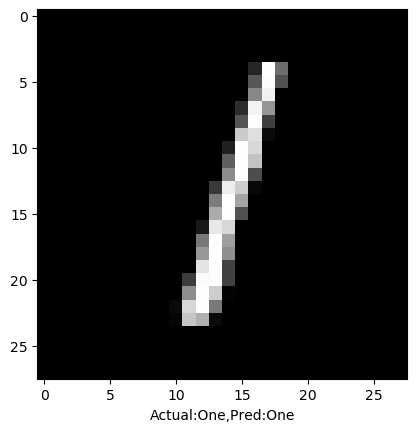

In [39]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
#plt.figure(figsize=(10,10))
plt.imshow(X_test_digit[2].reshape(28,28), cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_digit[2])],col_names[y_predicts_single[0]]))
plt.show()

In [40]:
y_test_digit[8]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)